# Loading the dataset from Kaggle
***Titanic dataset***

https://www.kaggle.com/competitions/titanic/data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/My Drive/RND4IMPACT'

In [ ]:
%cd /content/gdrive/My Drive/RND4IMPACT

/content/gdrive/My Drive/RND4IMPACT


In [ ]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

gender_submission.csv  test.csv		 titanic_df_submission.csv  titanic.zip
kaggle.json	       test_titanic.csv  titanic_model.sav	    train.csv


In [ ]:
gs = pd.read_csv('gender_submission.csv')

In [ ]:
gs.shape[0]

418

In [ ]:
!unzip titanic.zip

Archive:  titanic.zip


In [ ]:
!ls

gender_submission.csv  kaggle.json  test.csv  titanic.zip  train.csv


# Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data wrangling

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
## Counting how many unique products are in the dataset
print('The total count for Age is:',df['Age'].count())
print('The total unique count for Age is:',len(df['Age'].unique()))

The total count for Age is: 714
The total unique count for Age is: 89


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [ ]:
## Counting how many unique products are in the dataset
print('The total count for Cabin is:',df['Cabin'].count())
print('The total unique count for Cabin is:',len(df['Cabin'].unique()))

The total count for Cabin is: 204
The total unique count for Cabin is: 148


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Cabin'].fillna(method='ffill', inplace=True)

In [ ]:
df['Embarked'].fillna(method='ffill', inplace=True)

In [ ]:
df['Cabin'] = df['Cabin'].replace(np.nan,'Not Available')

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# EDA

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Available,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


### Correlation matrix

In [ ]:
sns.set(style="ticks")
numcols = ['PassengerId','Survived','Pclass','SibSp','Parch','Fare','Age']
catcols = ['Name','Sex','Ticket']
# Subset the columns
plot_df = df[numcols+ catcols]
# Few rows of data
plot_df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age,Name,Sex,Ticket
0,1,0,3,1,0,7.2500,22.0,"Braund, Mr. Owen Harris",male,A/5 21171
1,2,1,1,1,0,71.2833,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
2,3,1,3,0,0,7.9250,26.0,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
3,4,1,1,1,0,53.1000,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
4,5,0,3,0,0,8.0500,35.0,"Allen, Mr. William Henry",male,373450


In [ ]:
!pip install dython
from dython import nominal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/dython/nominal.py:151: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  RuntimeWarning,


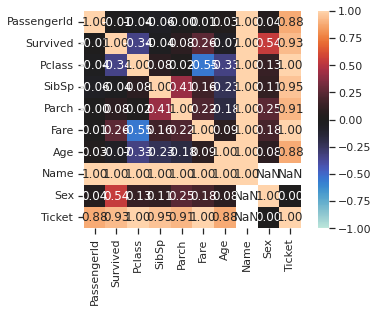

{'corr':              PassengerId  Survived    Pclass     SibSp     Parch      Fare  \
 PassengerId     1.000000 -0.005007 -0.035144 -0.057527 -0.001652  0.012658   
 Survived       -0.005007  1.000000 -0.338481 -0.035322  0.081629  0.257307   
 Pclass         -0.035144 -0.338481  1.000000  0.083081  0.018443 -0.549500   
 SibSp          -0.057527 -0.035322  0.083081  1.000000  0.414838  0.159651   
 Parch          -0.001652  0.081629  0.018443  0.414838  1.000000  0.216225   
 Fare            0.012658  0.257307 -0.549500  0.159651  0.216225  1.000000   
 Age             0.033207 -0.069809 -0.331339 -0.232625 -0.179191  0.091566   
 Name            1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
 Sex             0.042939  0.543351  0.131900  0.114631  0.245489  0.182333   
 Ticket          0.875688  0.927549  1.000000  0.947841  0.906266  1.000000   
 
                   Age  Name       Sex    Ticket  
 PassengerId  0.033207   1.0  0.042939  0.875688  
 Survived    -0.069

In [ ]:
nominal.associations(plot_df, nominal_columns=catcols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


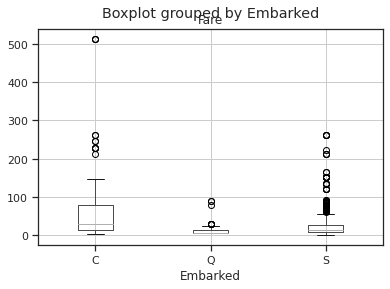

In [ ]:
df.boxplot(column="Fare",by = "Embarked")
plt.show()

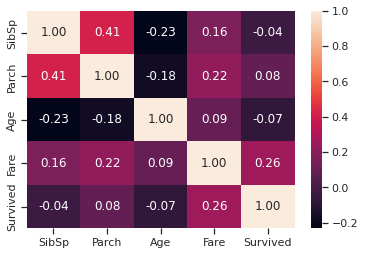

In [ ]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


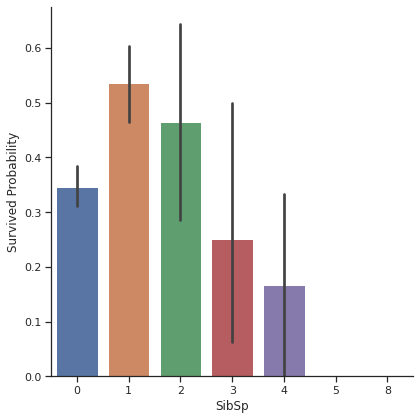

In [ ]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

#Train and build a model

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Available,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [ ]:
for col in ['Sex', 'Cabin', 'Embarked']:
    df[col] = pd.Categorical(df[col])
    df[col] = df[col].cat.codes

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,81,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,55,2


# Running a muller loop

In [ ]:
df_compare_muller = pd.DataFrame(columns=['Classifier','Accuracy/Score', 'Training Time'])

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [ ]:
import time as time

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA",# "XGBoost",
         "MLP"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier()]

X = df[['Embarked','Sex','Pclass','Fare','Age','Cabin']]
y = df[['Survived']]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    training_time = time.time() - start_time
    df_compare_muller.loc[-1] = [name, score, training_time]  # adding a row
    df_compare_muller.index = df_compare_muller.index + 1  # shifting index
    df_compare_muller = df_compare_muller.sort_index()
    df_compare_muller.reset_index(drop=True)

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Classifier = Nearest Neighbors, Score (test, accuracy) = 83.24, Training time = 0.01 seconds
Classifier = Linear SVM, Score (test, accuracy) = 82.68, Training time = 0.01 seconds
Classifier = RBF SVM, Score (test, accuracy) = 81.01, Training time = 0.03 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 82.68, Training time = 4.69 seconds
Classifier = Decision Tree, Score (test, accuracy) = 84.36, Training time = 0.00 seconds
Classifier = Random Forest, Score (test, accuracy) = 83.80, Training time = 0.03 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier = Neural Net, Score (test, accuracy) = 81.56, Training time = 1.01 seconds
Classifier = AdaBoost, Score (test, accuracy) = 82.68, Training time = 0.15 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 79.33, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 78.21, Training time = 0.00 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

Classifier = MLP, Score (test, accuracy) = 84.92, Training time = 1.07 seconds
--------------------------------------------------------------------------------
Best --> Classifier = MLP, Score (test, accuracy) = 84.92


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
import pickle
# save the model to disk
filename = 'titanic_model.sav'
pickle.dump(clf_best, open(filename, 'wb'))

In [ ]:
df_compare_muller

,Classifier,Accuracy/Score,Training Time
0,MLP,84.916201,1.066408
1,QDA,78.212291,0.003812
2,Naive Bayes,79.329609,0.003608
3,AdaBoost,82.681564,0.151931
4,Neural Net,81.564246,1.007389
5,Random Forest,83.798883,0.033390
6,Decision Tree,84.357542,0.005702
7,Gaussian Process,82.681564,4.688906
8,RBF SVM,81.005587,0.032837
9,Linear SVM,82.681564,0.011399


In [ ]:
test_titanic_df = pd.read_csv('test.csv')

In [ ]:
test_titanic_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [ ]:
print(X_test)

[[-1.93421952 -1.35557354 -1.56610693  0.92745387  1.87005862  0.45937146]
 [-0.67258731  0.73769513  0.82737724 -0.18029018  0.         -0.94877065]
 [ 0.58904489 -1.35557354 -1.56610693  1.16370019  0.40792596  0.24815015]
 ...
 [ 0.58904489 -1.35557354  0.82737724 -0.39724143  0.02315421  1.49200902]
 [ 0.58904489  0.73769513  0.82737724 -0.48633742  0.          0.92875217]
 [ 0.58904489  0.73769513  0.82737724 -0.50638754 -0.97725235  0.92875217]]


In [ ]:
test_titanic_df = test_titanic_df[['Embarked','Sex','Pclass','Fare','Age','Cabin']]
for col in ['Sex', 'Cabin', 'Embarked']:
    test_titanic_df[col] = pd.Categorical(test_titanic_df[col])
    test_titanic_df[col] = test_titanic_df[col].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_titanic_df.isnull().sum()

Embarked    0
Sex         0
Pclass      0
Fare        1
Age         0
Cabin       0
dtype: int64

In [ ]:
test_titanic_df['Age'].fillna(test_titanic_df['Age'].mean(), inplace = True)

In [ ]:
test_titanic_df['Fare'].fillna(test_titanic_df['Fare'].mean(), inplace = True)

In [ ]:
test_titanic_df.isnull().sum()

Embarked    0
Sex         0
Pclass      0
Fare        0
Age         0
Cabin       0
dtype: int64

In [ ]:
test_titanic_df.head()

,Embarked,Sex,Pclass,Fare,Age,Cabin
0,1,1,3,7.8292,34.5,-1
1,2,0,3,7.0000,47.0,-1
2,1,1,2,9.6875,62.0,-1
3,2,1,3,8.6625,27.0,-1
4,2,0,3,12.2875,22.0,-1


In [ ]:
test_titanic_df = StandardScaler().fit_transform(test_titanic_df)

In [ ]:
titanic_df_submission = pd.read_csv('test.csv')

In [ ]:
titanic_model = pickle.load( open( "titanic_model.sav", "rb" ) )
titanic_preds = titanic_model.predict(test_titanic_df)
print(titanic_preds)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 0 1 0 0 0]


In [ ]:
titanic_df_submission['Survived'] = titanic_preds
titanic_df_submission = titanic_df_submission[['PassengerId','Survived']]
titanic_df_submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
titanic_df_submission.to_csv('titanic_df_submission.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

ls: cannot open directory '.': Transport endpoint is not connected


MLP has the best accuracy and we can pick this model